## Load and normalize

In [1]:
import torch
import torchvision
from torchvision.transforms import v2
import matplotlib.pyplot as plt
import numpy as np
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
#device = 'cpu'

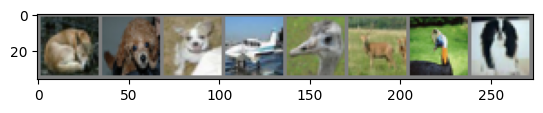

In [162]:
def imshow(img):
    img = img/2+0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.show()

dataiter = iter(trainloader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))

In [4]:
from data_loaders.brain_tumors_loader import get_loaders

trainloader, testloader, classes = get_loaders(batch_size=32)

c:\Work\Programs\Anaconda\envs\test\Lib\site-packages\torchvision\transforms\v2\_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


## Define a CNN

In [5]:
import torch.optim as optim
from nn_models.brain_tumors import Net

net = Net()
net.to(device)

criterion = torch.nn.CrossEntropyLoss()

In [6]:
optimizer = optim.Adam(net.parameters(), lr=0.00001)

## Train the network

In [7]:
from tqdm import tqdm

epochs = 2
loss_values = []
accuracy_line = 5

for epoch in range(epochs):
    running_loss = 0.0
    running_loss_epoch = 0.0
    for i, data in enumerate(tqdm(trainloader, desc=f"Epoch {epoch+1}"), 0): # 0 - is from which index starting
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad() 

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step() # updating model parameters

        running_loss += loss.item()

        if i % accuracy_line == accuracy_line - 1:
            loss_values.append(running_loss / accuracy_line)
            running_loss_epoch += running_loss
            running_loss = 0.0

            

    loss_epoch = running_loss_epoch / len(trainloader)
    print(f"Epoch {epoch+1} completed. Loss: {loss_epoch}")

print('Finished')

Epoch 1: 100%|██████████| 176/176 [00:12<00:00, 13.99it/s]


Epoch 1 completed. Loss: 1.3682454296133735


Epoch 2: 100%|██████████| 176/176 [00:14<00:00, 12.41it/s]

Epoch 2 completed. Loss: 0.8804977451535788
Finished


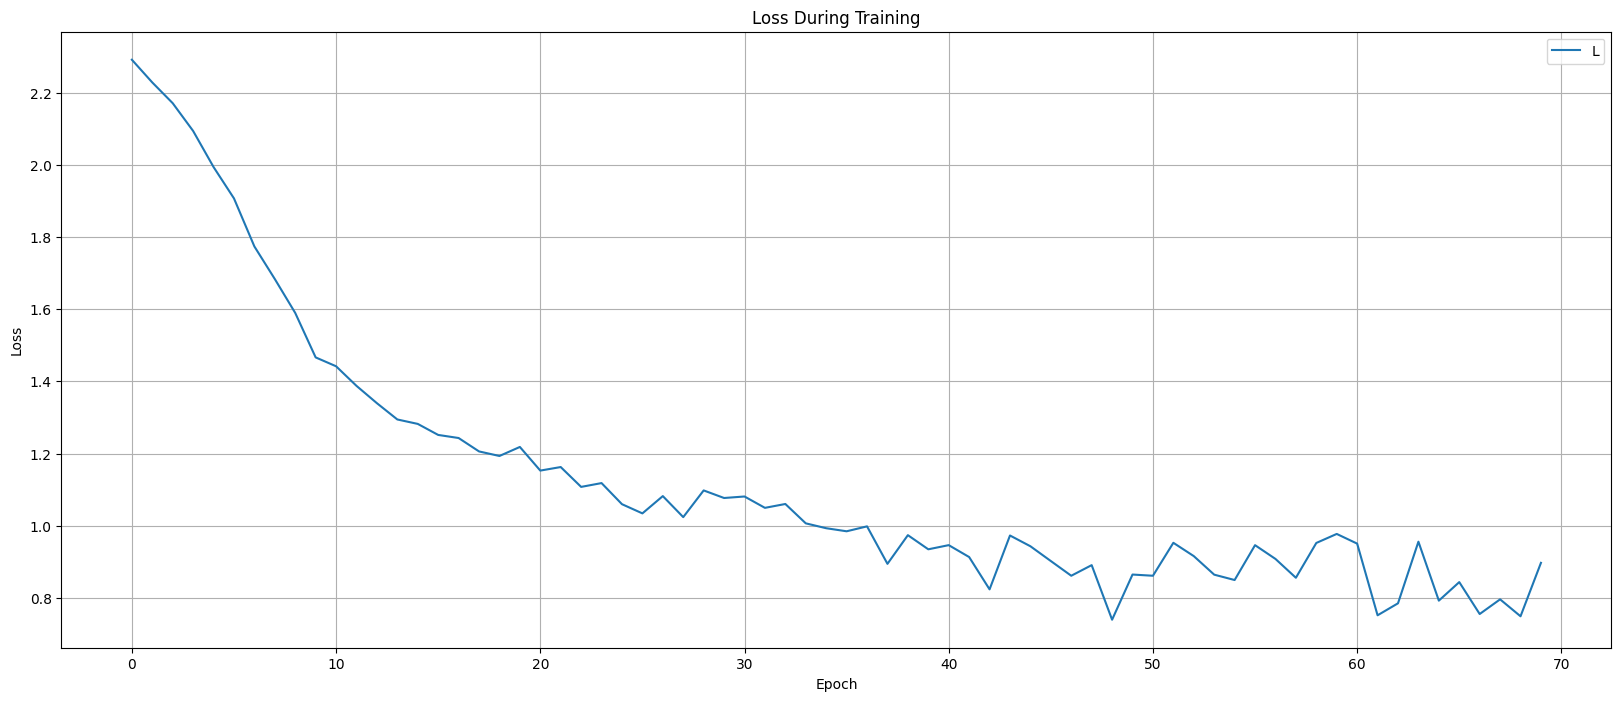

In [8]:
plt.figure(figsize=(20, 8))
plt.plot(loss_values)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss During Training', fontsize=12)
plt.grid()
plt.legend("L")
plt.show
plt.savefig('test.png', dpi=300)

## Saving and loading model

In [193]:
import os

PATH = 'trained_models/brain_tumors/testbigger.pth'
os.makedirs(os.path.dirname(PATH), exist_ok=True)
torch.save(net.state_dict(), PATH)

In [2]:
net = Net()
net.load_state_dict(torch.load(PATH, weights_only=True))
net.to(device)

NameError: name 'Net' is not defined

## Testing NN

In [9]:
correct, total, count = 0, 0, 0
matrix = np.zeros((len(classes), len(classes)))
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1) # 1 - is dimension
        total += labels.size(0) # by 0 - dimesion
        correct += (predicted == labels).sum().item() # comparing tensors, item return number
        
        np_predicted, np_labels = predicted.cpu().numpy(), labels.cpu().numpy()
        for i in range(len(np_labels)):
            count += 1
            if(np_predicted[i] == np_labels[i]):
                matrix[np_labels[i]][np_labels[i]] += 1
            else:
                matrix[np_labels[i]][np_predicted[i]] += 1

print(f'Accurecy of NN: {100 * correct / total} %')

Accurecy of NN: 74.14772727272727 %


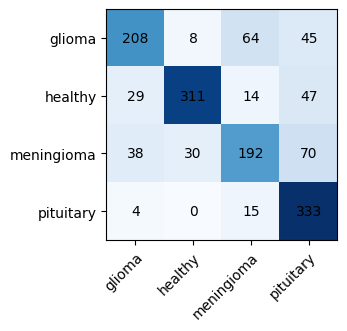

In [10]:
fig, ax = plt.subplots(figsize=(3,3))
im = ax.imshow(matrix, cmap='Blues')

ax.set_xticks(np.arange(len(classes)), labels=classes.keys())
ax.set_yticks(np.arange(len(classes)), labels=classes.keys())
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

for i in range(len(matrix[0])):
    for j in range(len(matrix[0])):
        text = ax.text(j, i, int(matrix[i, j]), ha="center", va="center", color="black")

plt.show()

In [150]:
torch.cuda.get_device_name(0)

'NVIDIA GeForce RTX 4070 Ti SUPER'

In [15]:
for name, param in net.named_parameters():
    print(f"Layer: {name}| Shape: {param.shape}")
    print(param)

Layer: conv1.weight| Shape: torch.Size([10, 3, 5, 5])
Parameter containing:
tensor([[[[ 6.7255e-03, -3.8450e-02,  1.0415e-01, -6.8693e-02,  6.6352e-02],
          [ 3.9777e-02,  1.0407e-01, -4.3790e-02,  2.1923e-02, -8.3820e-02],
          [ 8.1590e-02,  1.0107e-01, -8.0224e-02, -5.8354e-02, -4.1527e-02],
          [-1.0935e-01,  2.9298e-02,  2.1006e-02, -7.9275e-02,  1.2305e-02],
          [ 2.9160e-03, -2.2114e-02,  3.0292e-02,  4.3928e-02, -6.5143e-02]],

         [[-3.0142e-02,  2.5525e-02,  2.3530e-02, -1.6107e-02,  1.2599e-02],
          [ 5.3789e-02,  1.0045e-01, -3.8041e-02, -1.0901e-01, -8.4258e-02],
          [ 2.5953e-02, -7.9774e-02,  1.9244e-02, -9.9374e-02, -1.0502e-01],
          [-6.6801e-02, -9.9706e-02,  3.7776e-02, -9.2191e-02,  7.6570e-02],
          [ 5.6216e-02,  9.8967e-03,  1.1323e-01,  3.7292e-02,  8.4505e-02]],

         [[-3.2214e-02, -1.0263e-01,  7.1376e-02,  9.3415e-02,  3.4365e-02],
          [-3.0164e-02, -1.1231e-01,  4.3561e-03, -1.1677e-01, -1.1191e-0

In [19]:
net.fc2.weight

Parameter containing:
tensor([[ 0.0156,  0.0089,  0.0009,  ...,  0.0019, -0.0090, -0.0024],
        [ 0.0137,  0.0115, -0.0084,  ...,  0.0150, -0.0110, -0.0125],
        [-0.0065,  0.0068,  0.0094,  ...,  0.0082,  0.0107, -0.0017],
        ...,
        [ 0.0120,  0.0011, -0.0103,  ..., -0.0139, -0.0056, -0.0145],
        [-0.0131,  0.0129, -0.0083,  ..., -0.0064,  0.0158,  0.0102],
        [-0.0079, -0.0103,  0.0011,  ...,  0.0131, -0.0112,  0.0141]],
       device='cuda:0', requires_grad=True)

Try change transforms.Compose